In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)

In [5]:
mode_s=df.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x: x.mode()[0]))

In [6]:
mode_s

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [7]:
miss_v=df.Outlet_Size.isnull()

In [8]:
miss_v

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [20]:
df.loc[miss_v,"Outlet_Size"]=df.loc[miss_v,"Outlet_Type"].apply(lambda x: 
                                                                mode_s )

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

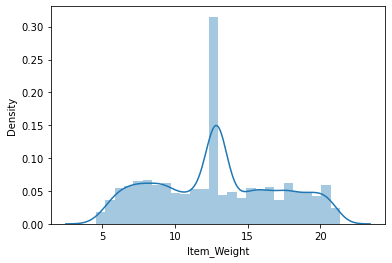

In [22]:
sns.distplot(df.Item_Weight)

In [23]:
sns.countplot(df["Outlet_Size"])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: unhashable type: 'DataFrame'

In [24]:
df["Outlet_Size"].value_counts()

TypeError: unhashable type: 'DataFrame'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'DataFrame'


Medium             2793
[Grocery Store]    2410
Small              2388
High                932
Name: Outlet_Size, dtype: int64

In [30]:
df.groupby("Outlet_Type").Outlet_Size.sum()

Outlet_Type
Grocery Store        Outlet_Type                                   ...
Supermarket Type1    Outlet_Type                                   ...
Supermarket Type2    MediumMediumMediumMediumMediumMediumMediumMedi...
Supermarket Type3    MediumMediumMediumMediumMediumMediumMediumMedi...
Name: Outlet_Size, dtype: object

In [33]:
df.Outlet_Size

0                                                  Medium
1                                                  Medium
2                                                  Medium
3       Outlet_Type Grocery Store Supermarket Type1 Su...
4                                                    High
                              ...                        
8518                                                 High
8519    Outlet_Type Grocery Store Supermarket Type1 Su...
8520                                                Small
8521                                               Medium
8522                                                Small
Name: Outlet_Size, Length: 8523, dtype: object

In [34]:
df.to_csv("error.csv")

In [35]:
df2=pd.read_csv("train.csv")

In [40]:
df2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [37]:
df2.Outlet_Size.fillna(method="ffill",inplace=True)

In [39]:
df2.Item_Weight.fillna(df2.Item_Weight.mean(),inplace=True)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

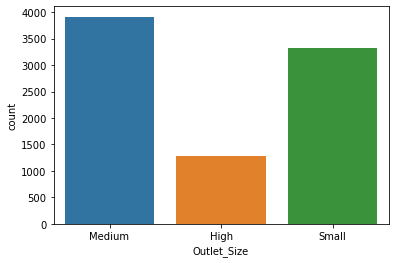

In [41]:
sns.countplot(df2.Outlet_Size )

In [42]:
df2.Outlet_Size.value_counts()

Medium    3912
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

In [43]:
df2.groupby("Outlet_Type").Outlet_Size.value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           744
                   Medium          260
                   High             79
Supermarket Type1  Small          2577
                   Medium         1789
                   High           1211
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [44]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
df2.Item_Fat_Content.value_counts()

low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [49]:
df2.replace({"Item_Fat_Content":{"Low Fat":"low fat","reg":"Regular","LF":"low fat"}},inplace=True)

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [52]:
encoder= LabelEncoder()

In [53]:
df2.Item_Identifier=encoder.fit_transform(df2.Item_Identifier)
df2.Item_Fat_Content=encoder.fit_transform(df2.Item_Fat_Content)
df2.Item_Type=encoder.fit_transform(df2.Item_Type)
df2.Outlet_Identifier=encoder.fit_transform(df2.Outlet_Identifier)
df2.Outlet_Size=encoder.fit_transform(df2.Outlet_Size)
df2.Outlet_Location_Type=encoder.fit_transform(df2.Outlet_Location_Type)
df2.Outlet_Type=encoder.fit_transform(df2.Outlet_Type)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [55]:
x=df2.drop(["Item_Outlet_Sales"],axis=1)
y=df2.Item_Outlet_Sales

In [56]:
x.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,0,0.019278,14,48.2692,3,2009,1,2,2


In [57]:
y.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [59]:
model=XGBRegressor()

In [60]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [62]:
train_data=model.predict(x_train)
score_train=metrics.r2_score(y_train,train_data)
print(score_train)

0.8651737894160819


In [64]:
test_data=model.predict(x_test)
score_test=metrics.r2_score(y_test,test_data)
print(score_test)

0.5259406386064476
